In [1]:
#loading the required libraries
library(tidyverse) 
library(lubridate)
library(ggplot2)
list.files(path = "../input")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] "amazon-top-50-bestselling-books-2009-2019"

In [2]:
#naming the dataset as 'bestsellers' and using the functions glipmse and head to get a peek into the dataset and to get the first 6 rows respectively
bestsellers<-read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
glimpse(bestsellers)
head(bestsellers)

Rows: 550 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Name, Author, Genre
dbl (4): User Rating, Reviews, Price, Year


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Rows: 550
Columns: 7
$ Name          <chr> "10-Day Green Smoothie Cleanse", "11/22/63: A Novel", "1…
$ Author        <chr> "JJ Smith", "Stephen King", "Jordan B. Peterson", "Georg…
$ `User Rating` <dbl> 4.7, 4.6, 4.7, 4.7, 4.8, 4.4, 4.7, 4.7, 4.7, 4.6, 4.6, 4…
$ Reviews       <dbl> 17350, 2052, 18979, 21424, 7665, 12643, 19735, 19699, 59…
$ Price         <dbl> 8, 22, 15, 6, 12, 11, 30, 15, 3, 8, 8, 2, 32, 5, 17, 4, …
$ Year          <dbl> 2016, 2011, 2018, 2017, 2019, 2011, 2014, 2017, 2018, 20…
$ Genre         <chr> "Non Fiction", "Fiction", "Non Fiction", "Fiction", "Non…


Name,Author,User Rating,Reviews,Price,Year,Genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12,2019,Non Fiction
A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


In [3]:
#this gives a comprehensive summary of our table and its various columns along with their minimum and maximum values as and when required
summary(bestsellers)

     Name              Author           User Rating       Reviews     
 Length:550         Length:550         Min.   :3.300   Min.   :   37  
 Class :character   Class :character   1st Qu.:4.500   1st Qu.: 4058  
 Mode  :character   Mode  :character   Median :4.700   Median : 8580  
                                       Mean   :4.618   Mean   :11953  
                                       3rd Qu.:4.800   3rd Qu.:17253  
                                       Max.   :4.900   Max.   :87841  
     Price            Year         Genre          
 Min.   :  0.0   Min.   :2009   Length:550        
 1st Qu.:  7.0   1st Qu.:2011   Class :character  
 Median : 11.0   Median :2014   Mode  :character  
 Mean   : 13.1   Mean   :2014                     
 3rd Qu.: 16.0   3rd Qu.:2017                     
 Max.   :105.0   Max.   :2019                     

In [4]:
#we load the 'skimr' library to use the function skim_without_charts to get summary statistics
library(skimr)
skim_without_charts(bestsellers)

── Data Summary ────────────────────────
                           Values     
Name                       bestsellers
Number of rows             550        
Number of columns          7          
_______________________               
Column type frequency:                
  character                3          
  numeric                  4          
________________________              
Group variables            None       

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Name                  0             1     4   121     0      351          0
2 Author                0             1     2    34     0      248          0
3 Genre                 0             1     7    11     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate     mean        sd     p0    p25    p50
1 User Rating

In [5]:
#we convert the 'bestsellers' data frame to 'data' dataframe 
#here, table is sorted in increasing order by year and janitor library is used to clean the column names
#column names now do not contain spaces or capital letters. This is done for the ease of coding and referencing

data<- bestsellers %>% arrange(Year)
library(janitor)
data<-clean_names(data)
head(data)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




name,author,user_rating,reviews,price,year,genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
"Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment",Steve Harvey,4.6,5013,17,2009,Non Fiction
Arguing with Idiots: How to Stop Small Minds and Big Government,Glenn Beck,4.6,798,5,2009,Non Fiction
"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
Dead And Gone: A Sookie Stackhouse Novel (Sookie Stackhouse/True Blood),Charlaine Harris,4.6,1541,4,2009,Fiction
Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction


In [6]:
#we create a new table 'rating_by_authors' from 'data'
rating_by_authors<-data %>%
group_by(author, name, genre) %>% #grouping by author, name and genre
drop_na()%>% #drop rows containing missing values
summarise(mean_rating=mean(user_rating))%>% #summarise the groupings by a new column 'mean_rating' which gives the average user rating
arrange(-mean_rating) #sort by descending average mean user ratings
rating_by_authors #display the table

`summarise()` has grouped output by 'author', 'name'. You can override using the `.groups` argument.



author,name,genre,mean_rating
<chr>,<chr>,<chr>,<dbl>
Alice Schertle,Little Blue Truck,Fiction,4.9
Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",Fiction,4.9
Brandon Stanton,Humans of New York : Stories,Non Fiction,4.9
Chip Gaines,The Magnolia Story,Non Fiction,4.9
Dav Pilkey,Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4),Fiction,4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),Fiction,4.9
Dav Pilkey,Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),Fiction,4.9
Dav Pilkey,Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Fiction,4.9
Dav Pilkey,Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7),Fiction,4.9


author,name,genre,mean_rating
<chr>,<chr>,<chr>,<dbl>
Alice Schertle,Little Blue Truck,Fiction,4.9
Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",Fiction,4.9
Brandon Stanton,Humans of New York : Stories,Non Fiction,4.9
Chip Gaines,The Magnolia Story,Non Fiction,4.9
Dav Pilkey,Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4),Fiction,4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),Fiction,4.9
Dav Pilkey,Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),Fiction,4.9
Dav Pilkey,Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),Fiction,4.9
Dav Pilkey,Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7),Fiction,4.9


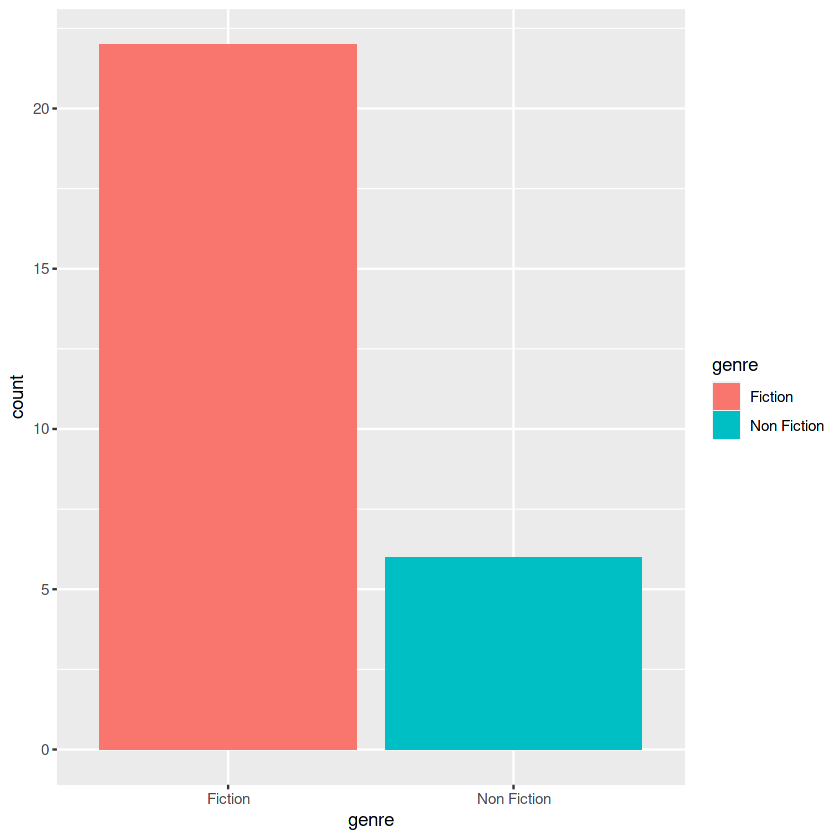

In [7]:
#creating new table 'highest_rating' from 'rating_by_authors'
highest_rating<-rating_by_authors %>%
filter(mean_rating==4.9) #only ratings equal to 4.9(which is the highest as can be ascertained by our summary of 'bestsellers') are displayed
highest_rating#displaying the table
#mapping a plot to display the genres of highest rated books bestsellers
ggplot(data=highest_rating)+ 
geom_bar(mapping=aes(x=genre, fill=genre))

author,name,genre,mean_rating
<chr>,<chr>,<chr>,<dbl>
J.K. Rowling,The Casual Vacancy,Fiction,3.3


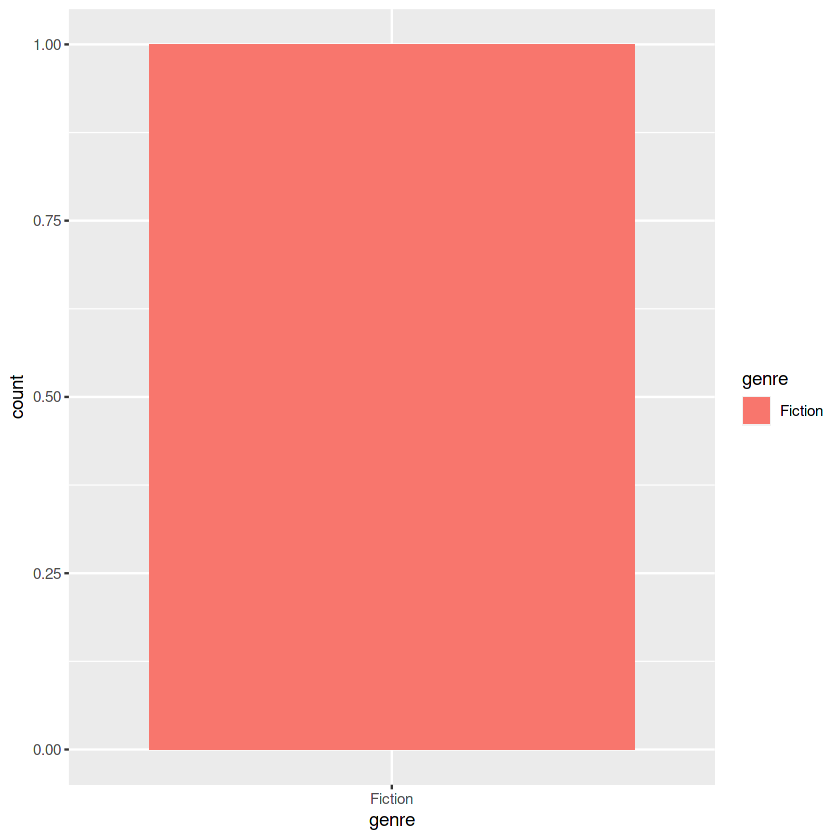

In [8]:
#following same steps as above, except to analyse the lowest rated bestsellers
lowest_rating<-rating_by_authors %>%
filter(mean_rating==3.3)
lowest_rating
ggplot(data=lowest_rating)+
geom_bar(mapping=aes(x=genre, fill=genre))


In [9]:
#creating a new table 'rating_by_year' from 'data' to get the mean ratings, no.of reviews and book prices by year
rating_by_year<-data %>%
group_by(year)%>% #grouping by year
drop_na() %>% #dropping rows containing missing values
#summarising by 3 parameters- average ratings, reviews and prices
summarise(mean_rating=mean(user_rating), mean_reviews=mean(reviews), mean_price=mean(price))
rating_by_year #displaying table
summary(rating_by_year) #obtaining summary of table

year,mean_rating,mean_reviews,mean_price
<dbl>,<dbl>,<dbl>,<dbl>
2009,4.584,4710.12,15.40
2010,4.558,5479.62,13.48
2011,4.558,8100.82,15.10
2012,4.532,13090.92,15.30
2013,4.554,13098.14,14.60
2014,4.622,15859.94,14.64
2015,4.648,14233.38,10.42
2016,4.678,14196.00,13.18
2017,4.660,12888.40,11.38


      year       mean_rating     mean_reviews     mean_price   
 Min.   :2009   Min.   :4.532   Min.   : 4710   Min.   :10.08  
 1st Qu.:2012   1st Qu.:4.558   1st Qu.:10495   1st Qu.:10.95  
 Median :2014   Median :4.622   Median :13098   Median :13.48  
 Mean   :2014   Mean   :4.618   Mean   :11953   Mean   :13.10  
 3rd Qu.:2016   3rd Qu.:4.664   3rd Qu.:14215   3rd Qu.:14.87  
 Max.   :2019   Max.   :4.740   Max.   :15898   Max.   :15.40  

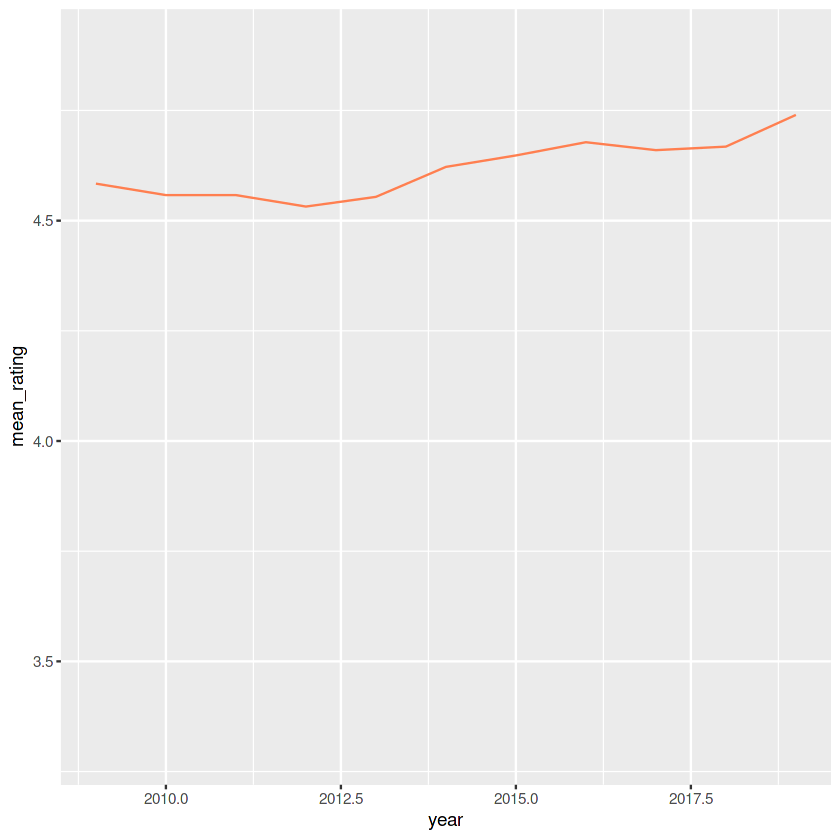

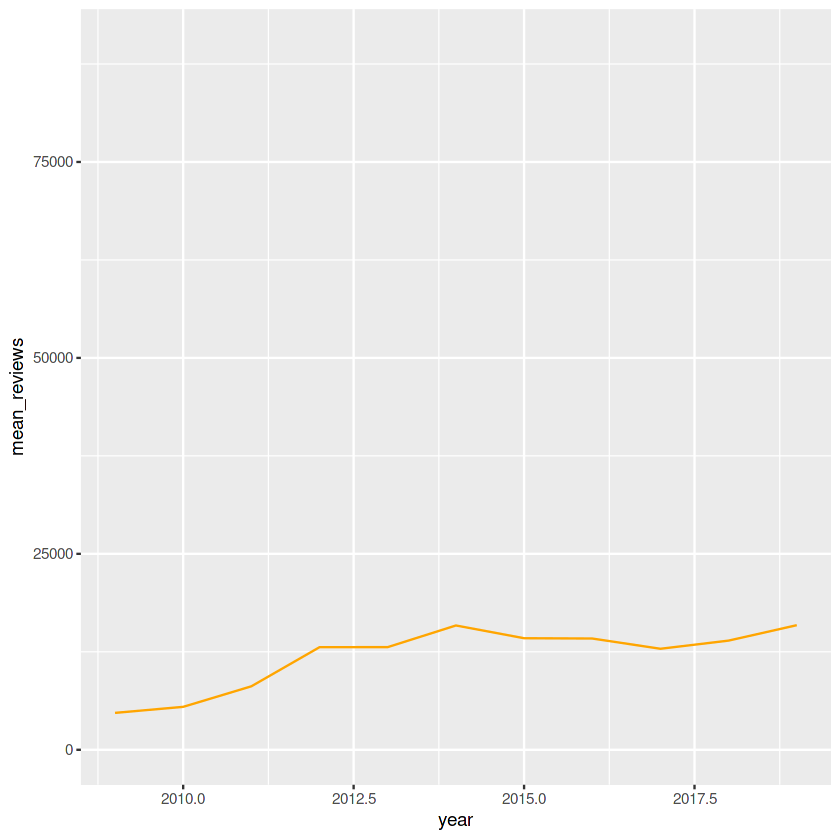

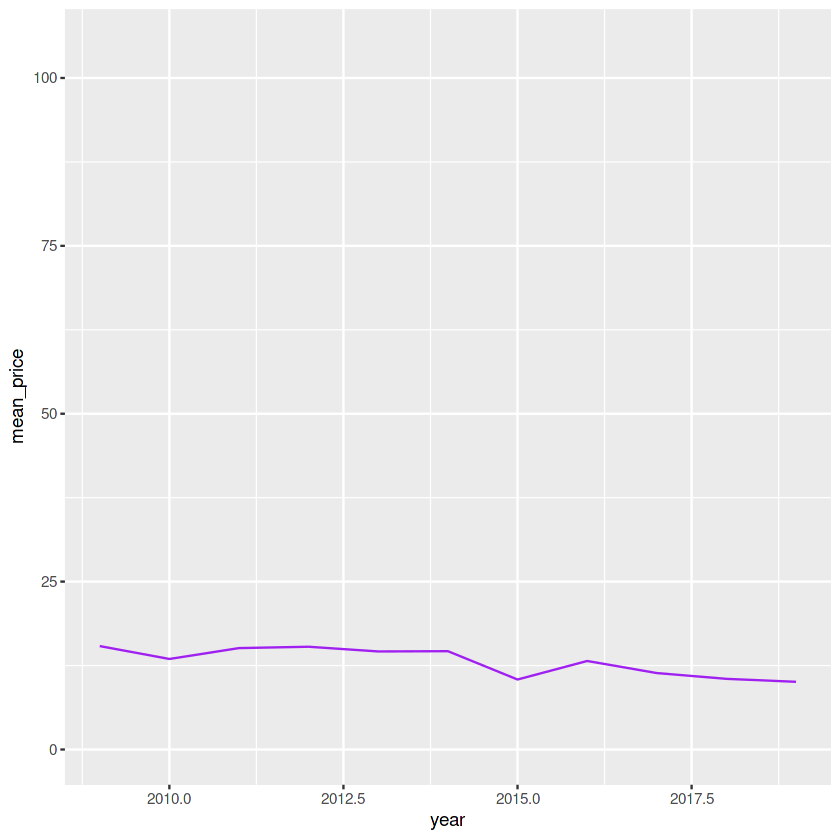

In [10]:
#plot to compare the mean ratings of bestsellers each year from 2009 to 2019
ggplot(data=rating_by_year)+
geom_line(mapping=aes(x=year, y=mean_rating), color="coral")+
xlim(2009, 2019)+
ylim(3.3, 4.9)



#plot to compare the average number of reviews of bestsellers each year from 2009 to 2019
ggplot(data=rating_by_year)+
geom_line(mapping=aes(x=year, y=mean_reviews), color="orange")+
xlim(2009, 2019)+
ylim(37, 90000)



#plot to compare the mean prices of bestsellers each year from 2009 to 2019
ggplot(data=rating_by_year)+
geom_line(mapping=aes(x=year, y=mean_price), color="purple")+
xlim(2009, 2019)+
ylim(0, 105)

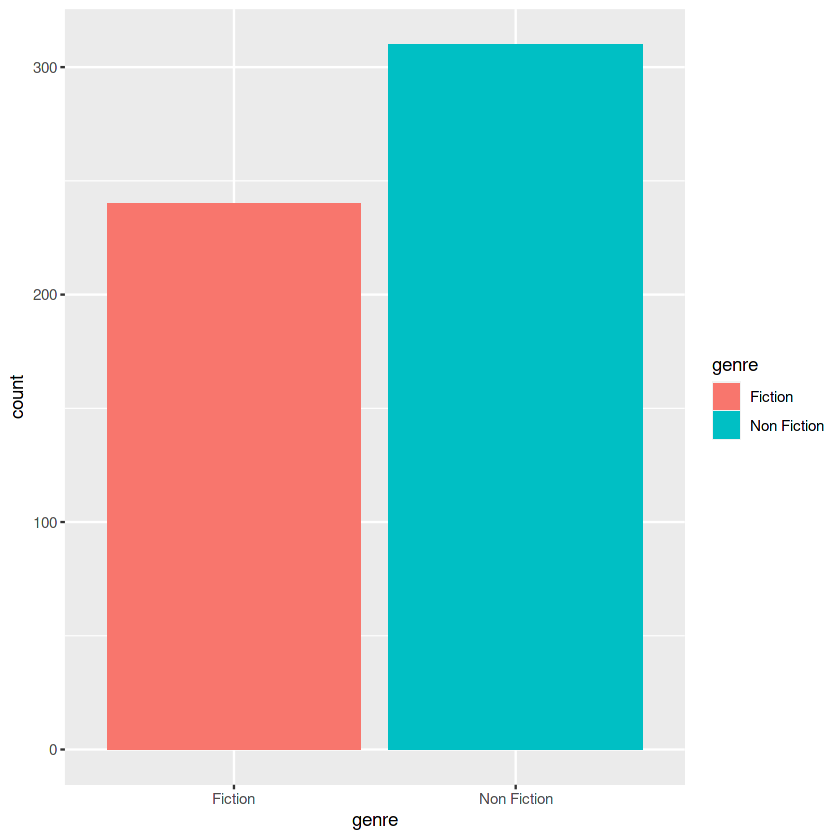

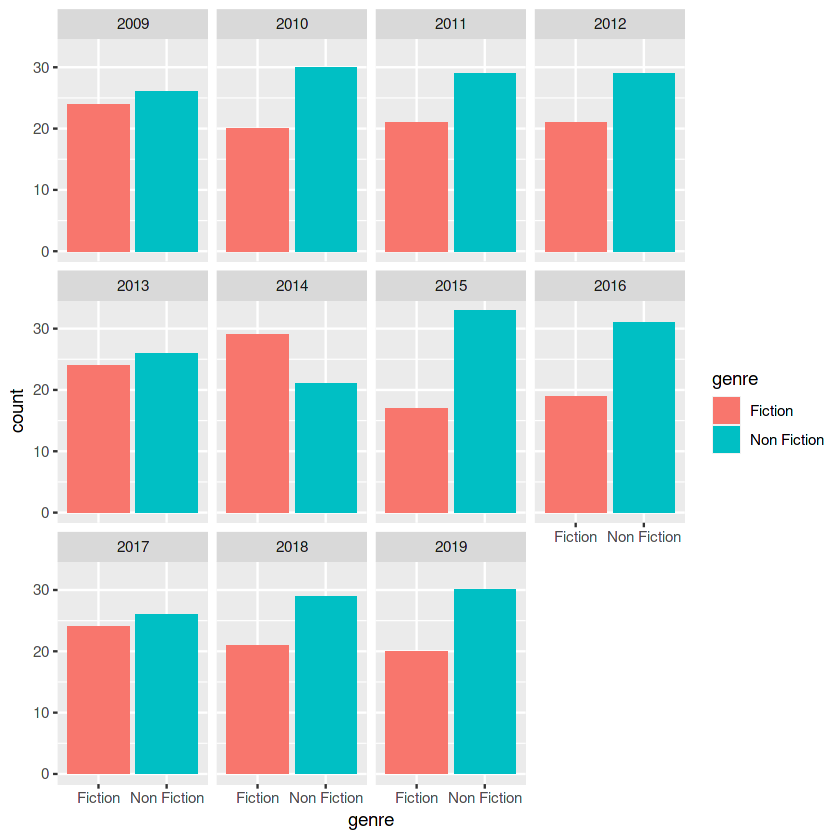

In [11]:
#comparing the total numbers of non fiction and fiction genres
ggplot(data=data)+
geom_bar(mapping=aes(x=genre, fill=genre))
#comparing this by each year by faceting our plot
ggplot(data=data)+
geom_bar(mapping=aes(x=genre, fill=genre))+
facet_wrap(~year)

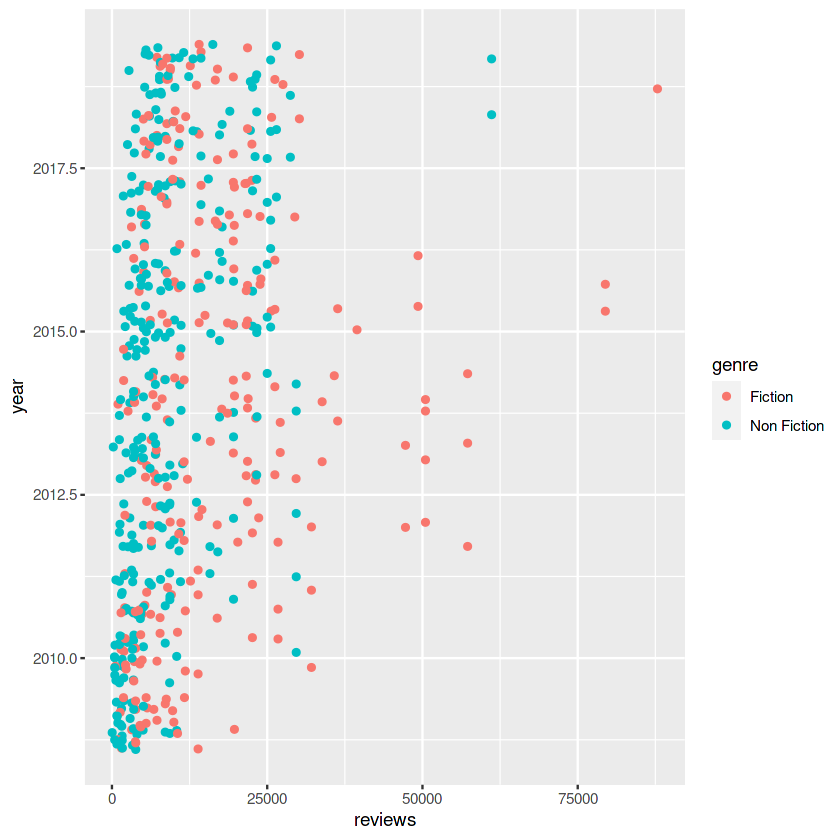

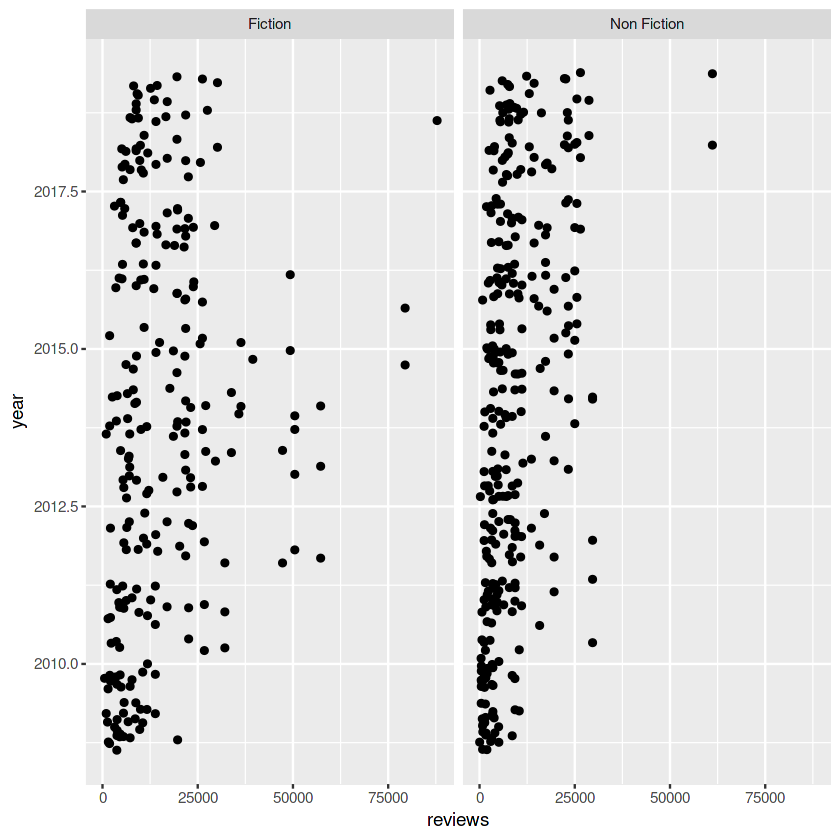

In [12]:
#visualising the number of reviews by year and differentiating them by genre
ggplot(data=data)+
geom_jitter(mapping=aes(x=reviews, y=year, color=genre))
#now displaying genres in different plots for clarity
ggplot(data=data)+
geom_jitter(mapping=aes(x=reviews, y=year))+
facet_wrap(~genre)

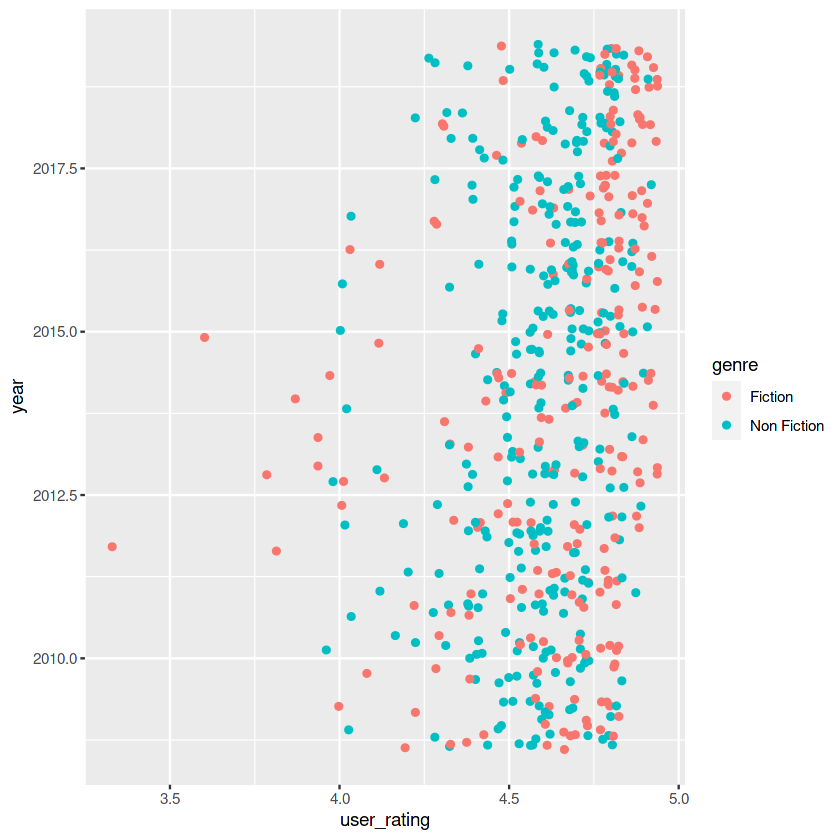

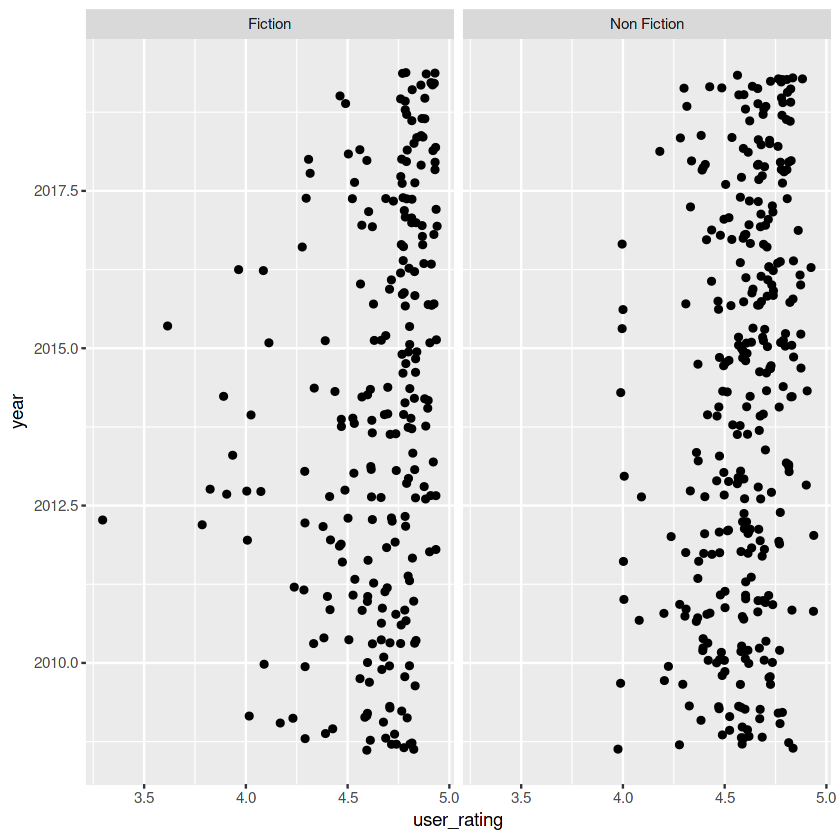

In [13]:
#visualising the user ratings by year and differentiating them by genre
ggplot(data=data)+
geom_jitter(mapping=aes(x=user_rating, y=year, color=genre))
#now displaying genres in different plots for clarity
ggplot(data=data)+
geom_jitter(mapping=aes(x=user_rating, y=year))+
facet_wrap(~genre)

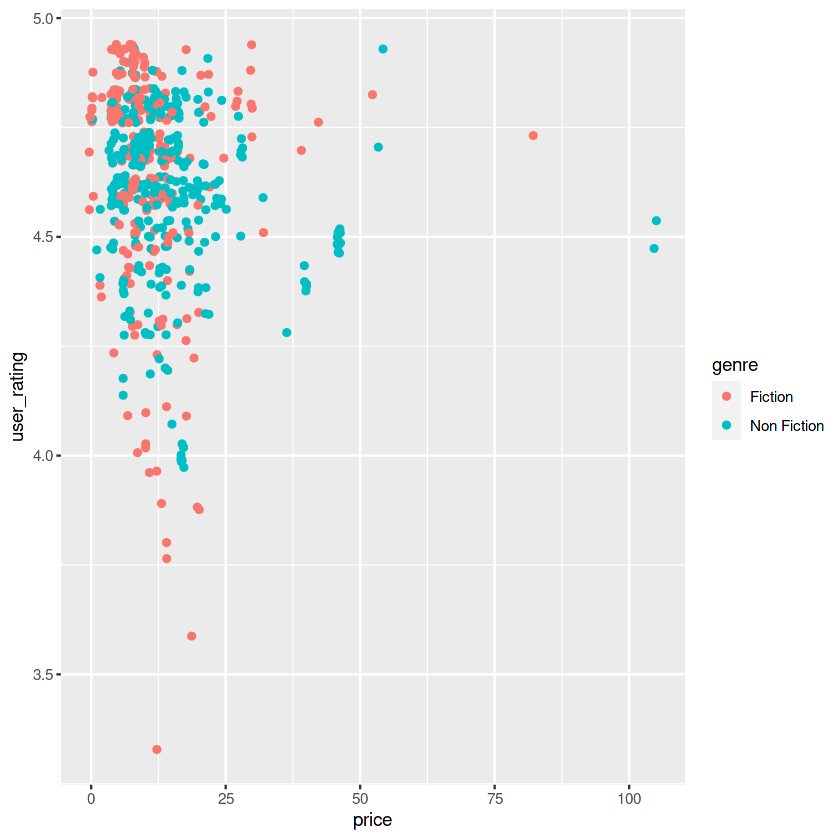

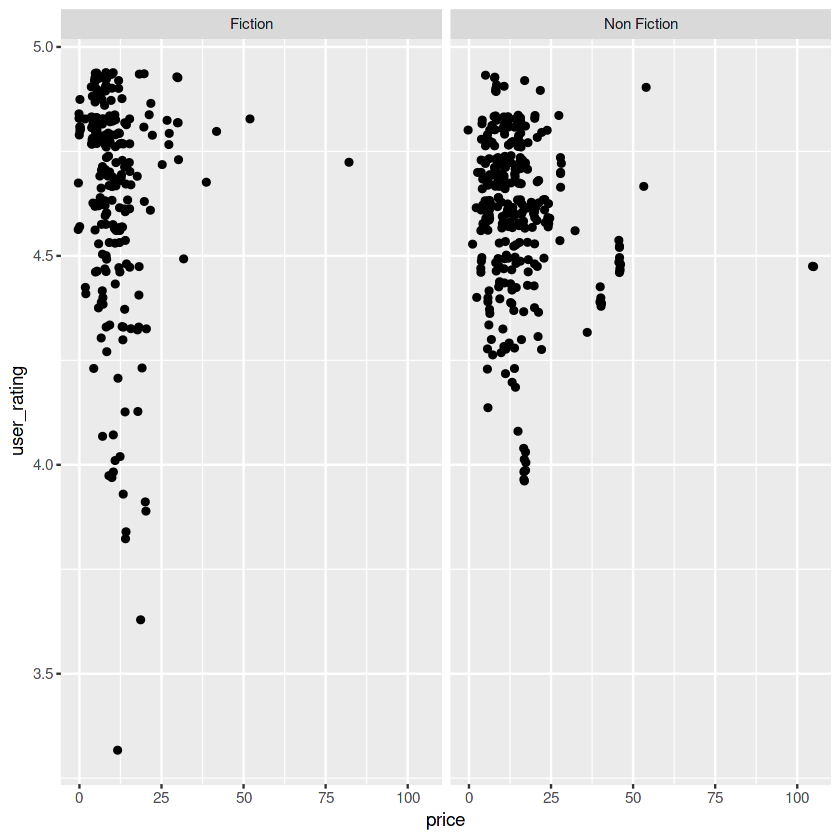

In [14]:
#comparing the user ratings by price and differentiating them by genre
ggplot(data=data)+
geom_jitter(mapping=aes(x=price, y=user_rating, color=genre))
#now displaying genres in different plots for clarity
ggplot(data=data)+
geom_jitter(mapping=aes(x=price, y=user_rating))+
facet_wrap(~genre)

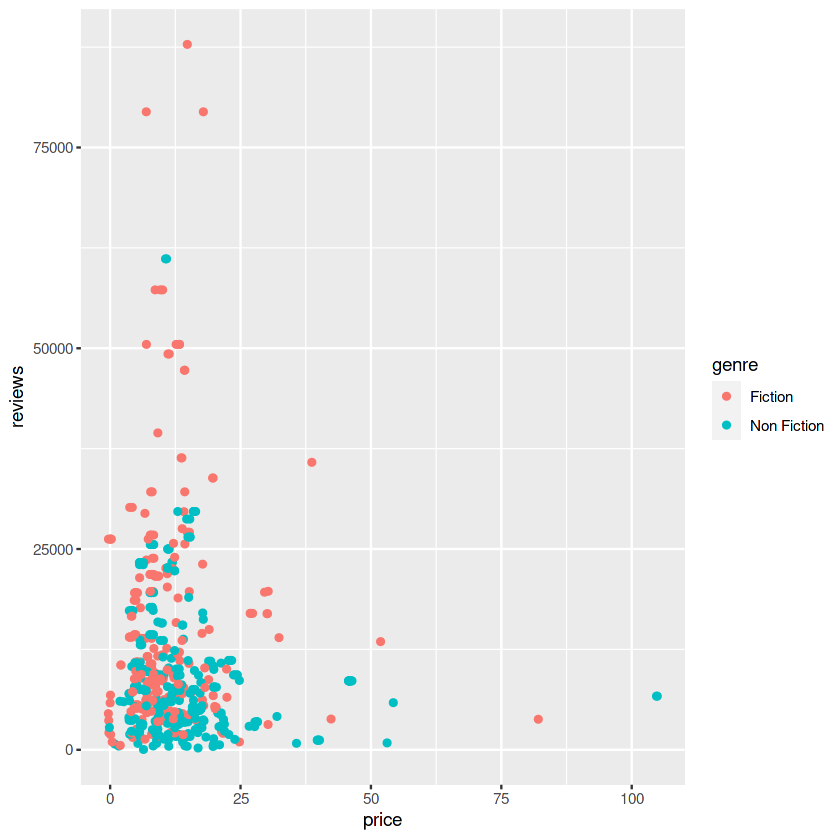

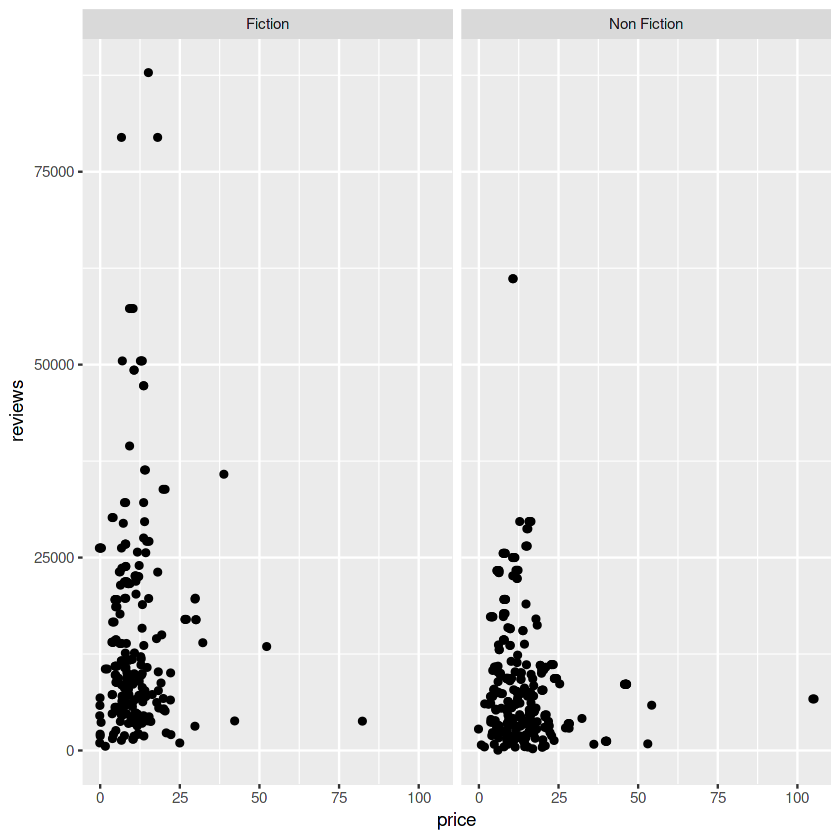

In [15]:
#comparing number of reviews by price and differentiating them by genre
ggplot(data=data)+
geom_jitter(mapping=aes(x=price, y=reviews, color=genre))
#now displaying genres in different plots for clarity
ggplot(data=data)+
geom_jitter(mapping=aes(x=price, y=reviews))+
facet_wrap(~genre)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



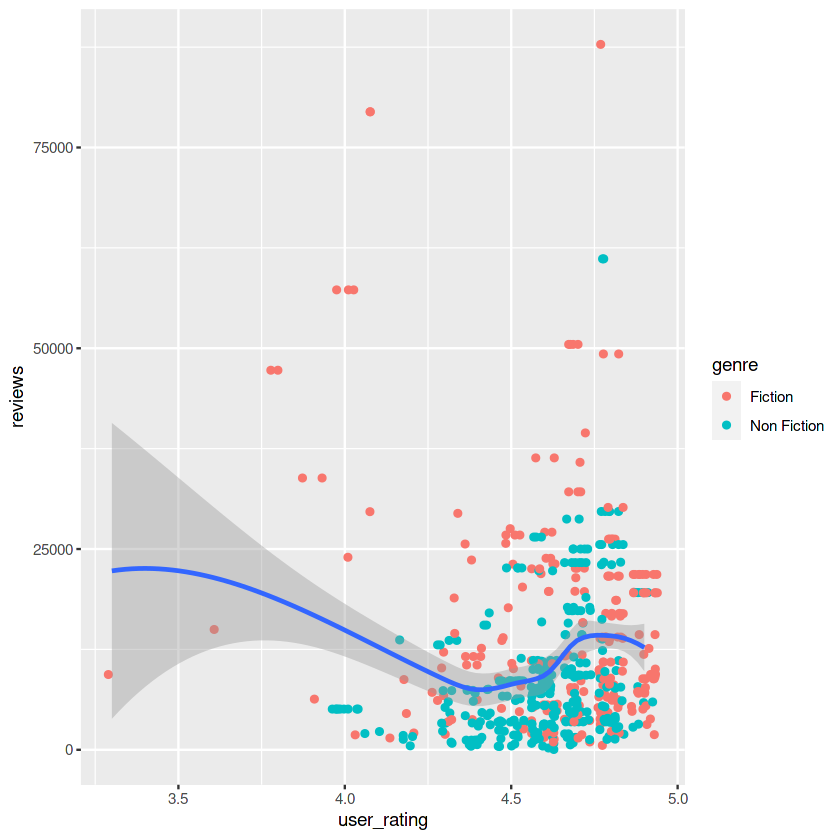

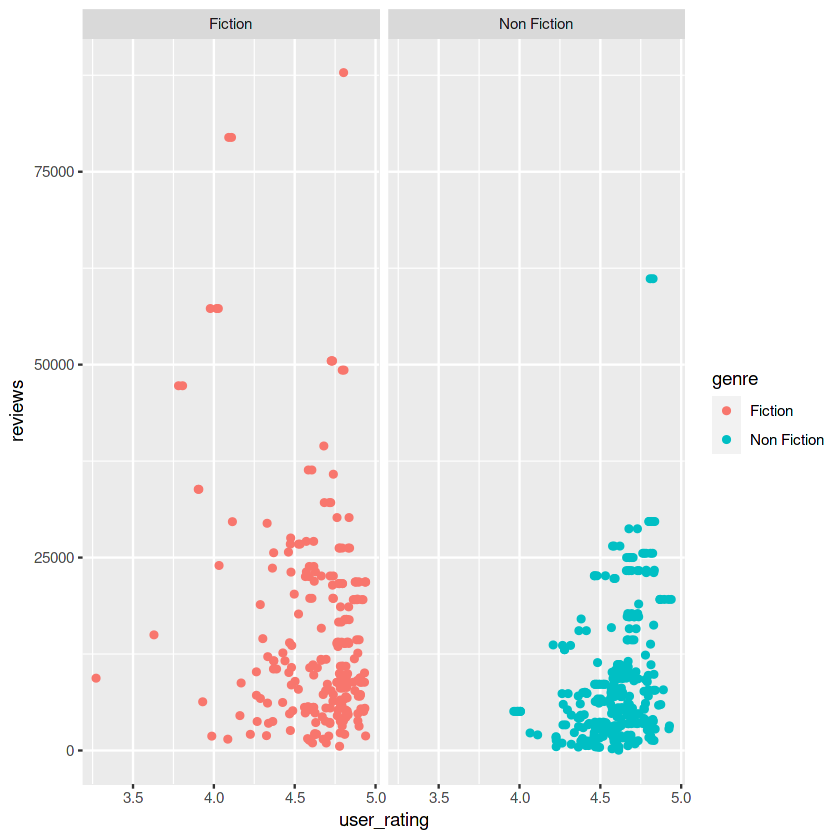

In [16]:
#comparing number of reviews by user ratings and differentiating them by genre
ggplot(data=data)+
geom_jitter(mapping=aes(x=user_rating, y=reviews, color=genre))+
geom_smooth(mapping=aes(x=user_rating, y=reviews))
#now displaying genres in different plots for clarity
ggplot(data=data)+
geom_jitter(mapping=aes(x=user_rating, y=reviews, color=genre))+
facet_wrap(~genre)

In [17]:
#loading library 'dplyr' for using the count function
library(dplyr)
count_data<-data%>% #creating new table 'count_data' from 'data'
count(author) #counts the occurrences of the various author
head(count_data) #displaying the first 6 rows

author,n
<chr>,<int>
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
Adult Coloring Book Designs,1


In [18]:
count_data<-count_data%>% #updating the table
arrange(-n) #arranging by decreasing order of count
head(count_data, 8) #displaying the first 8 values

author,n
<chr>,<int>
Jeff Kinney,12
Gary Chapman,11
Rick Riordan,11
Suzanne Collins,11
American Psychological Association,10
Dr. Seuss,9
Gallup,9
Rob Elliott,8


In [19]:
#creating a new table of the bestselling authors featured the most number of times in the list
highest_selling<-head(count_data, 5) 
highest_selling

author,n
<chr>,<int>
Jeff Kinney,12
Gary Chapman,11
Rick Riordan,11
Suzanne Collins,11
American Psychological Association,10


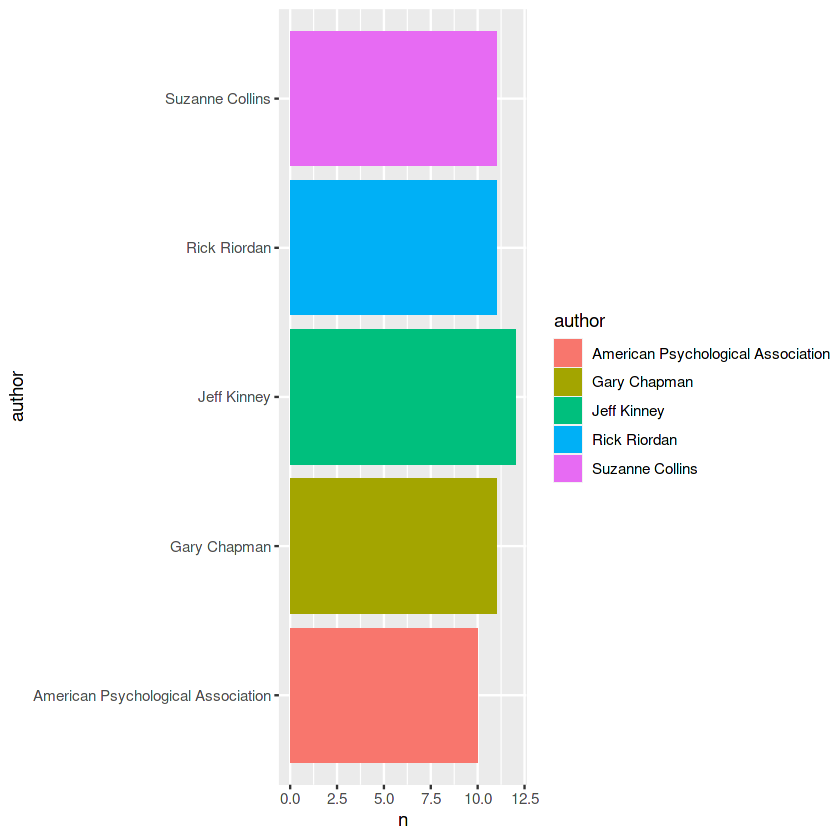

In [20]:
#creating a bar chart to display the bestselling authors featured the most number of times in the list
ggplot(highest_selling, aes(x=n,y = author, fill=author))+
geom_bar(stat = "identity")